<a href="https://colab.research.google.com/github/uu07/awesome-google-colab/blob/master/colab_mnist_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## this imports some software that we need for the tutorial

from PIL import Image, ImageChops, ImageMath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## load the dataset, download from google if needed

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Dimensions of train data: {train_images.shape}")
print(f"Dimensions of test data: {test_images.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Dimensions of train data: (60000, 28, 28)
Dimensions of test data: (10000, 28, 28)


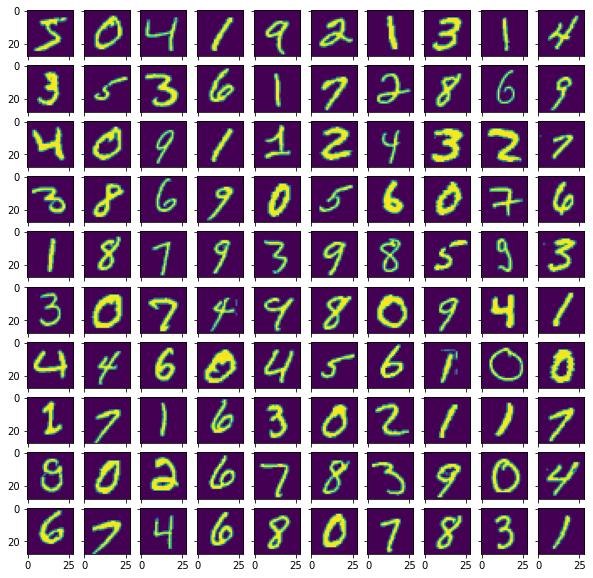

In [3]:
## this code shows some of the images in our trainset

fig, axes = plt.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)

for i in range(10):
  for j in range(10):
    axes[i,j].imshow(train_images[i * 10 + j])

In [4]:
## these are the labels

train_labels[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [5]:
## to get a single training (or test) instance, you can index with a number

train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

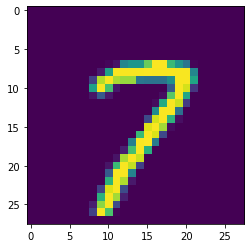

In [6]:
## this is an array with pixel values, with the code below you can see the image
plt.imshow(train_images[230])

In [7]:
## for training we want the pixel values to be between 0 and 1, and instead of a matrix, we want a single vector of length 784

X_train = train_images.reshape(60000, -1) / 255
X_test = test_images.reshape(10000, -1) / 255

X_train[230]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

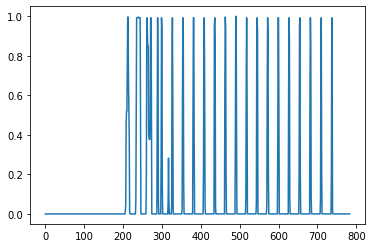

In [8]:
## another way to look at the training data - no problem for a computer but no human would be able to recognize a seven in this image

plt.plot(np.arange(784), X_train[230])

In [0]:
## this is the point of the tutorial
## creating a neural network is easy and very concrete

from tensorflow.keras import models, layers

model = models.Sequential()

## we have one hidden layer with 512 "neurons"
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))

## output has 10 neurons, corresponding to 10 digits
model.add(layers.Dense(10, activation='softmax'))

In [0]:
## with this line, we tell how to optimize and which metrics to track
## the model is actually compiled to run on the GPU

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
## this line starts the training
## you can see the error on the trainset and the error on the testset
## after how many epochs does the model start overfitting?

hist = model.fit(X_train, train_labels, epochs=10, batch_size=32, validation_data=(X_test, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1997 - accuracy: 0.9404 - val_loss: 0.1058 - val_accuracy: 0.9677
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.0969 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9814 - val_loss: 0.0805 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9856 - val_loss: 0.0892 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9887 - val_loss: 0.1052 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.0829 - val_accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9930 - val_loss: 0.0971 - val_accuracy:

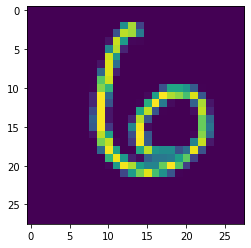

In [13]:
## reported accuracy is 98%, let's see

test_sample = X_test[100]

plt.imshow(test_sample.reshape(28, 28))

In [14]:
test_labels[100]

6

In [15]:
## a technical challenge, the model outputs probabilities, not the actual label

model.predict(X_test[100].reshape(1,-1))

array([[1.8764465e-14, 9.3988650e-23, 2.8192446e-14, 6.0357967e-20,
        1.6200832e-18, 9.0567887e-14, 1.0000000e+00, 2.6243635e-18,
        2.6647177e-16, 1.3786940e-22]], dtype=float32)

In [0]:
## here is a helper function to convert dimensions and translate the probabilities

def get_model_prediction(model, sample):
  sample = np.asarray(sample)
  if sample.shape in [(28, 28), (784,)]:
    p = model.predict(sample.reshape(1, -1))
  else:
    raise Exception(f"Wrong input dimension: {sample.shape}")
  return np.argmax(p)

In [17]:
get_model_prediction(model, X_test[100])

6

In [0]:
## here is a function that allows you to upload files

from google.colab import files

def upload_image():

  uploaded = files.upload()
  arr = np.asarray(Image.open(list(uploaded.keys())[0]))
  arr = arr.max(axis = 2)
  return 1 - arr / arr.max()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
img = upload_image()

In [0]:
plt.imshow(img)

In [0]:
get_model_prediction(model, img)